# Project Title: Building a Convolutional Neural Nets (CNN) to classify images in the CIFAR-10 Dataset

## Section 1: Objective of the Project
The objectives of the project are two-fold: 
* apply convolutional neural network (CNN) to classify a specific set of images 
* compare the performance of different CNN architectures.   



## Section 2: Description of Dataset
This project uses the CIFAR-100 dataset. This dataset consists of 32x32 color images divided into 100 classes. Since each class has 600 images, it has 60000 images (600x100) in total. 
The 100 classes are:


| Superclass | Class |
|------|------|
| aquatic mammals | beaver, dolphin, otter, seal, whale |
fish | aquarium fish, flatfish, ray, shark, trout
flowers | orchids, poppies, roses, sunflowers, tulips
food containers | bottles, bowls, cans, cups, plates
fruit and vegetables | apples, mushrooms, oranges, pears, sweet peppers
household electrical devices | clock, computer keyboard, lamp, telephone, television
household furniture | bed, chair, couch, table, wardrobe
insects | bee, beetle, butterfly, caterpillar, cockroach
large carnivores | bear, leopard, lion, tiger, wolf
large man-made outdoor things | bridge, castle, house, road, skyscraper
large natural outdoor scenes | cloud, forest, mountain, plain, sea
large omnivores and herbivores | camel, cattle, chimpanzee, elephant, kangaroo
medium-sized mammals | fox, porcupine, possum, raccoon, skunk
non-insect invertebrates | crab, lobster, snail, spider, worm
people | baby, boy, girl, man, woman
reptiles | crocodile, dinosaur, lizard, snake, turtle
small mammals | hamster, mouse, rabbit, shrew, squirrel
trees | maple, oak, palm, pine, willow
vehicles 1 | bicycle, bus, motorcycle, pickup truck, train
vehicles 2 | lawn-mower, rocket, streetcar, tank, tractor

There are 50000 training images and 10000 test images. 


## Section 3: Importing of the Packages

In [17]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

## Section 4: Data Loading and Preparation

### Data loading, shuffling and splitting between train and test sets

In [4]:

(x_train, y_train), (x_test, y_test) = cifar100.load_data()


169009152/169001437 [==============================] - 21s 0us/step


### Data size

In [5]:

print('Dimension of training data:', x_train.shape)
print('Number of train samples:', x_train.shape[0])
print('Number of test samples:', x_test.shape[0])


Dimension of training data: (50000, 32, 32, 3)
Number of train samples: 50000
Number of test samples: 10000


### Random sample images from test and train data

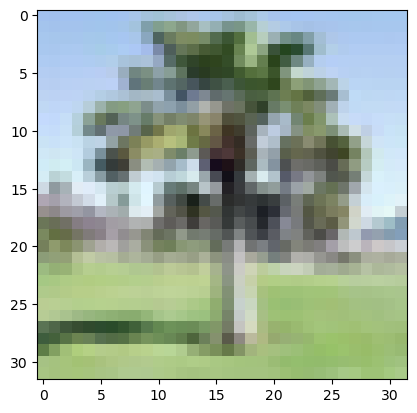

In [6]:

plt.imshow(x_train[1234]);


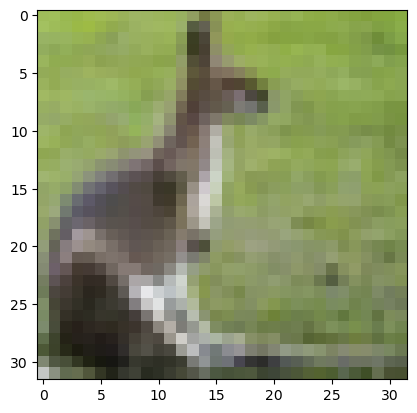

In [7]:

plt.imshow(x_test[1234]);


### Normalize the data

In [5]:
num_classes = 100

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Now, instead of classes described by an integer between 0-99 we have a vector with a 1 in the (Pythonic) ith position (see array example below)


In [10]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

#### Convert the data to float and scale them

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Section 5: Build CNN Models
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.


### Basic parameters

In [10]:
# number of epochs
epoch = 5
# size of batch
batch_size = 32
# optimizer tolerance
epsilon = 0.0005


### Model 1: Simple model [Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification]

In [9]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(batch_size, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(batch_size, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_5 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [22]:
x_train.shape[1:]

(32, 32, 3)

We still have 181K parameters, even though this is a "small" model.


In [11]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=epsilon)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples


2025-02-18 18:09:00.419955: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2025-02-18 18:09:00.435389: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394305000 Hz
2025-02-18 18:09:00.435888: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ea40412350 executing computations on platform Host. Devices:
2025-02-18 18:09:00.435938: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2025-02-18 18:09:00.498247: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

Epoch 1/5
50000/50000 [==============================] - 75s 2ms/sample - loss: 4.7657 - acc: 0.0098 - val_loss: 4.6031 - val_acc: 0.0108
Epoch 2/5
50000/50000 [==============================] - 74s 1ms/sample - loss: 4.6417 - acc: 0.0087 - val_loss: 4.6043 - val_acc: 0.0101
Epoch 3/5
50000/50000 [==============================] - 71s 1ms/sample - loss: 4.6119 - acc: 0.0094 - val_loss: 4.6043 - val_acc: 0.0102
Epoch 4/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 4.6092 - acc: 0.0094 - val_loss: 4.6048 - val_acc: 0.0100
Epoch 5/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 4.6120 - acc: 0.0100 - val_loss: 4.6044 - val_acc: 0.0100


### Model 2: LeNet-5

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=x_train.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(units=400, activation='relu'))
model_2.add(Dense(units=120, activation='relu'))
model_2.add(Dense(units=100, activation = 'softmax'))
model_2.summary()

In [24]:
# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 63s 1ms/sample - loss: 4.7852 - acc: 0.0258 - val_loss: 4.2307 - val_acc: 0.0554
Epoch 2/5
50000/50000 [==============================] - 60s 1ms/sample - loss: 3.9177 - acc: 0.1033 - val_loss: 3.7033 - val_acc: 0.1443
Epoch 3/5
50000/50000 [==============================] - 60s 1ms/sample - loss: 3.5030 - acc: 0.1735 - val_loss: 3.4458 - val_acc: 0.1860
Epoch 4/5
50000/50000 [==============================] - 62s 1ms/sample - loss: 3.2703 - acc: 0.2139 - val_loss: 3.2821 - val_acc: 0.2146
Epoch 5/5
50000/50000 [==============================] - 61s 1ms/sample - loss: 3.1145 - acc: 0.2418 - val_loss: 3.2727 - val_acc: 0.2221


### Model 3: Alex

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=x_train.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(units=400, activation='relu'))
model_2.add(Dense(units=120, activation='relu'))
model_2.add(Dense(units=100, activation = 'softmax'))
model_2.summary()

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

5. Try different structures and run times, and see how accurate your model can be.


In [ ]:
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

---
### Machine Learning Foundation (C) 2020 IBM Corporation
